# BRAN2020 data catalogue demo
### a single `intake-esm` catalog

Date: 25 August, 2023

Author = {"name": "Thomas Moore", "affiliation": "CSIRO", "email": "thomas.moore@csiro.au", "orcid": "0000-0003-3930-1946"}

### 16TB of data over nearly 8500 `netcdf` file assests in total.

### Compute using "small" ARE cluster at NCI ( 2 CPU & 9GB RAM )
cost = 2.5 SUs per hour = 10 cents per hour

#### required packages

In [85]:
import intake
import xarray as xr
from matplotlib import pyplot as plt

#### start a local Dask client

In [62]:
from dask.distributed import Client
client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43379,Workers: 28
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:38949,Total threads: 1
Dashboard: /proxy/36321/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:41797,


#### ignore warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

### read paths from config file

#### [ you will need to specifiy your correct path for the `data-catalogue/config.ini` file ]

In [4]:
import configparser

# Create a ConfigParser object
config = configparser.ConfigParser()

# Read the config file
#########
#### you will need to specifiy your correct path the the `data-catalogue/config.ini` file 
#########
config.read('./code/BRAN2020-intake-catalog/config.ini')

# Get the value of a variable
catalog_path = config.get('paths', 'catalog_path')

In [5]:
catalog_path

'/g/data/v14/tm4888/code/BRAN2020-intake-catalog/catalogs/'

In [6]:
BRAN2020_catalog = intake.open_esm_datastore(catalog_path+'BRAN2020.json',columns_with_iterables=['variable'])

In [8]:
BRAN2020_catalog

,unique
source,1
domain,4
time_period,4
variable,142
path,8949
derived_variable,0


In [13]:
BRAN2020_catalog.unique()['source']

['BRAN2020']

In [12]:
BRAN2020_catalog.unique()['domain']

['atm', 'ice', 'ocean', 'grid']

In [15]:
BRAN2020_catalog.unique()['time_period']

['annual', 'daily', 'month', 'static']

In [28]:
var_list = BRAN2020_catalog.unique()['variable']
var_list.sort()
var_list

['angle_C',
 'angle_E',
 'angle_N',
 'angle_T',
 'area_C',
 'area_E',
 'area_N',
 'area_T',
 'bmf_u',
 'bmf_v',
 'depth_t',
 'ds_00_01_C',
 'ds_00_01_E',
 'ds_00_01_N',
 'ds_00_01_T',
 'ds_00_02_C',
 'ds_00_02_E',
 'ds_00_02_N',
 'ds_00_02_T',
 'ds_00_10_C',
 'ds_00_10_E',
 'ds_00_10_N',
 'ds_00_10_T',
 'ds_00_20_C',
 'ds_00_20_E',
 'ds_00_20_N',
 'ds_00_20_T',
 'ds_01_02_C',
 'ds_01_02_E',
 'ds_01_02_N',
 'ds_01_02_T',
 'ds_01_11_C',
 'ds_01_11_E',
 'ds_01_11_N',
 'ds_01_11_T',
 'ds_01_21_C',
 'ds_01_21_E',
 'ds_01_21_N',
 'ds_01_21_T',
 'ds_02_12_C',
 'ds_02_12_E',
 'ds_02_12_N',
 'ds_02_12_T',
 'ds_02_22_C',
 'ds_02_22_E',
 'ds_02_22_N',
 'ds_02_22_T',
 'ds_10_11_C',
 'ds_10_11_E',
 'ds_10_11_N',
 'ds_10_11_T',
 'ds_10_12_C',
 'ds_10_12_E',
 'ds_10_12_N',
 'ds_10_12_T',
 'ds_10_20_C',
 'ds_10_20_E',
 'ds_10_20_N',
 'ds_10_20_T',
 'ds_11_12_C',
 'ds_11_12_E',
 'ds_11_12_N',
 'ds_11_12_T',
 'ds_11_21_C',
 'ds_11_21_E',
 'ds_11_21_N',
 'ds_11_21_T',
 'ds_12_22_C',
 'ds_12_22_E',
 'ds_1

In [29]:
search_uv = BRAN2020_catalog.search(variable=['u','v'])

In [30]:
search_uv.unique()['variable']

['u', 'v']

In [32]:
search_uv

,unique
source,1
domain,1
time_period,3
variable,2
path,1512
derived_variable,0


In [31]:
search_uv.df

,source,domain,time_period,variable,path
0,BRAN2020,ocean,annual,[u],/g/data/gb6/BRAN/BRAN2020/annual/ocean_u_ann_1...
1,BRAN2020,ocean,annual,[u],/g/data/gb6/BRAN/BRAN2020/annual/ocean_u_ann_1...
2,BRAN2020,ocean,annual,[u],/g/data/gb6/BRAN/BRAN2020/annual/ocean_u_ann_1...
3,BRAN2020,ocean,annual,[u],/g/data/gb6/BRAN/BRAN2020/annual/ocean_u_ann_1...
4,BRAN2020,ocean,annual,[u],/g/data/gb6/BRAN/BRAN2020/annual/ocean_u_ann_1...
...,...,...,...,...,...
1507,BRAN2020,ocean,month,[v],/g/data/gb6/BRAN/BRAN2020/month/ocean_v_mth_20...
1508,BRAN2020,ocean,month,[v],/g/data/gb6/BRAN/BRAN2020/month/ocean_v_mth_20...
1509,BRAN2020,ocean,month,[v],/g/data/gb6/BRAN/BRAN2020/month/ocean_v_mth_20...
1510,BRAN2020,ocean,month,[v],/g/data/gb6/BRAN/BRAN2020/month/ocean_v_mth_20...


In [34]:
Datasets = search_uv.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'domain.time_period'


In [48]:
Datasets.keys()

dict_keys(['ocean.annual', 'ocean.daily', 'ocean.month'])

In [49]:
DS = Datasets['ocean.month']

In [51]:
DS

<xarray.Dataset>
Dimensions:   (Time: 360, st_ocean: 51, yu_ocean: 1500, xu_ocean: 3600)
Coordinates:
  * xu_ocean  (xu_ocean) float64 0.1 0.2 0.3 0.4 0.5 ... 359.7 359.8 359.9 360.0
  * yu_ocean  (yu_ocean) float64 -74.9 -74.8 -74.7 -74.6 ... 74.7 74.8 74.9 75.0
  * st_ocean  (st_ocean) float64 2.5 7.5 12.5 ... 2.895e+03 3.603e+03 4.509e+03
  * Time      (Time) datetime64[ns] 1993-01-16T12:00:00 ... 2022-12-16T12:00:00
Data variables:
    u         (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 51, 1500, 3600), meta=np.ndarray>
    v         (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 51, 1500, 3600), meta=np.ndarray>
Attributes:
    NumFilesInSet:                   20
    grid_type:                       regular
    grid_tile:                       N/A
    title:                           BRAN2020
    catalogue_doi_url:               http://dx.doi.org/10.25914/6009627c7af03
    acknowledgement:                 BRAN is made freely available by CSIRO B...
    intake_esm_attrs:source:         BRAN2020
    intake_esm_attrs:domain:         ocean
    intake_esm_attrs:time_period:    month
    intake_esm_attrs:_data_format_:  netcdf
    intake_esm_dataset_key:          ocean.month

# search on variable and period

# Out of some 8500 files we now have narrowed down the 720 that have just the information we need

In [53]:
search_uv_month = BRAN2020_catalog.search(variable=['u','v'],time_period='month')
search_uv_month

,unique
source,1
domain,1
time_period,1
variable,2
path,720
derived_variable,0


# We can now load all that data into a single "lazy" `xarray` object for further reduction and analysis
## Size is reduced from 16TB to 720GB

In [56]:
%%time
DS = search_uv_month.to_dask()

CPU times: user 4.91 s, sys: 320 ms, total: 5.23 s
Wall time: 7.08 s


In [57]:
DS

<xarray.Dataset>
Dimensions:   (Time: 360, st_ocean: 51, yu_ocean: 1500, xu_ocean: 3600)
Coordinates:
  * xu_ocean  (xu_ocean) float64 0.1 0.2 0.3 0.4 0.5 ... 359.7 359.8 359.9 360.0
  * yu_ocean  (yu_ocean) float64 -74.9 -74.8 -74.7 -74.6 ... 74.7 74.8 74.9 75.0
  * st_ocean  (st_ocean) float64 2.5 7.5 12.5 ... 2.895e+03 3.603e+03 4.509e+03
  * Time      (Time) datetime64[ns] 1993-01-16T12:00:00 ... 2022-12-16T12:00:00
Data variables:
    u         (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 51, 1500, 3600), meta=np.ndarray>
    v         (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 51, 1500, 3600), meta=np.ndarray>
Attributes:
    NumFilesInSet:                   20
    grid_type:                       regular
    grid_tile:                       N/A
    title:                           BRAN2020
    catalogue_doi_url:               http://dx.doi.org/10.25914/6009627c7af03
    acknowledgement:                 BRAN is made freely available by CSIRO B...
    intake_esm_attrs:source:         BRAN2020
    intake_esm_attrs:domain:         ocean
    intake_esm_attrs:time_period:    month
    intake_esm_attrs:_data_format_:  netcdf
    intake_esm_dataset_key:          ocean.month

# RESULT : compute the depth averaged `u` and `v` currents 
# over upper 2000m
# for the Pacific

In [78]:
DS_slice = DS.sel(st_ocean= slice(0,2000)).sel(xu_ocean=slice(130,2790)).sel(yu_ocean=slice(-60,20)).mean('st_ocean')

In [79]:
DS_slice

<xarray.Dataset>
Dimensions:   (Time: 360, yu_ocean: 801, xu_ocean: 2301)
Coordinates:
  * xu_ocean  (xu_ocean) float64 130.0 130.1 130.2 130.3 ... 359.8 359.9 360.0
  * yu_ocean  (yu_ocean) float64 -60.0 -59.9 -59.8 -59.7 ... 19.7 19.8 19.9 20.0
  * Time      (Time) datetime64[ns] 1993-01-16T12:00:00 ... 2022-12-16T12:00:00
Data variables:
    u         (Time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 801, 2301), meta=np.ndarray>
    v         (Time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 801, 2301), meta=np.ndarray>

## this selection is reduced to less than 5 GB from the 16TB total
### so lets load into memory for quick calculations

In [80]:
%%time
DS_slice = DS_slice.compute()

CPU times: user 55.6 s, sys: 16.7 s, total: 1min 12s
Wall time: 3min 34s


# produce a climatology

In [89]:
%%time
clim_uv = DS_slice.groupby('Time.season').mean('Time')

CPU times: user 23.8 s, sys: 1min 6s, total: 1min 30s
Wall time: 1min 12s


In [90]:
clim_uv

<xarray.Dataset>
Dimensions:   (season: 4, yu_ocean: 801, xu_ocean: 2301)
Coordinates:
  * xu_ocean  (xu_ocean) float64 130.0 130.1 130.2 130.3 ... 359.8 359.9 360.0
  * yu_ocean  (yu_ocean) float64 -60.0 -59.9 -59.8 -59.7 ... 19.7 19.8 19.9 20.0
  * season    (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    u         (season, yu_ocean, xu_ocean) float32 0.05118 0.04433 ... nan nan
    v         (season, yu_ocean, xu_ocean) float32 0.001456 0.004923 ... nan nan

## Plot current vectors for summer

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.ticker as ticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
from matplotlib import mlab, cm, gridspec
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline 

In [98]:
%%time
# Define the u and v components of the currents
season_choice = 'DJF'
u = clim_uv.u.sel(season=season_choice)
v = clim_uv.v.sel(season=season_choice)
speed = np.sqrt(u**2 + v**2)

CPU times: user 32.4 ms, sys: 19.9 ms, total: 52.3 ms
Wall time: 68.7 ms


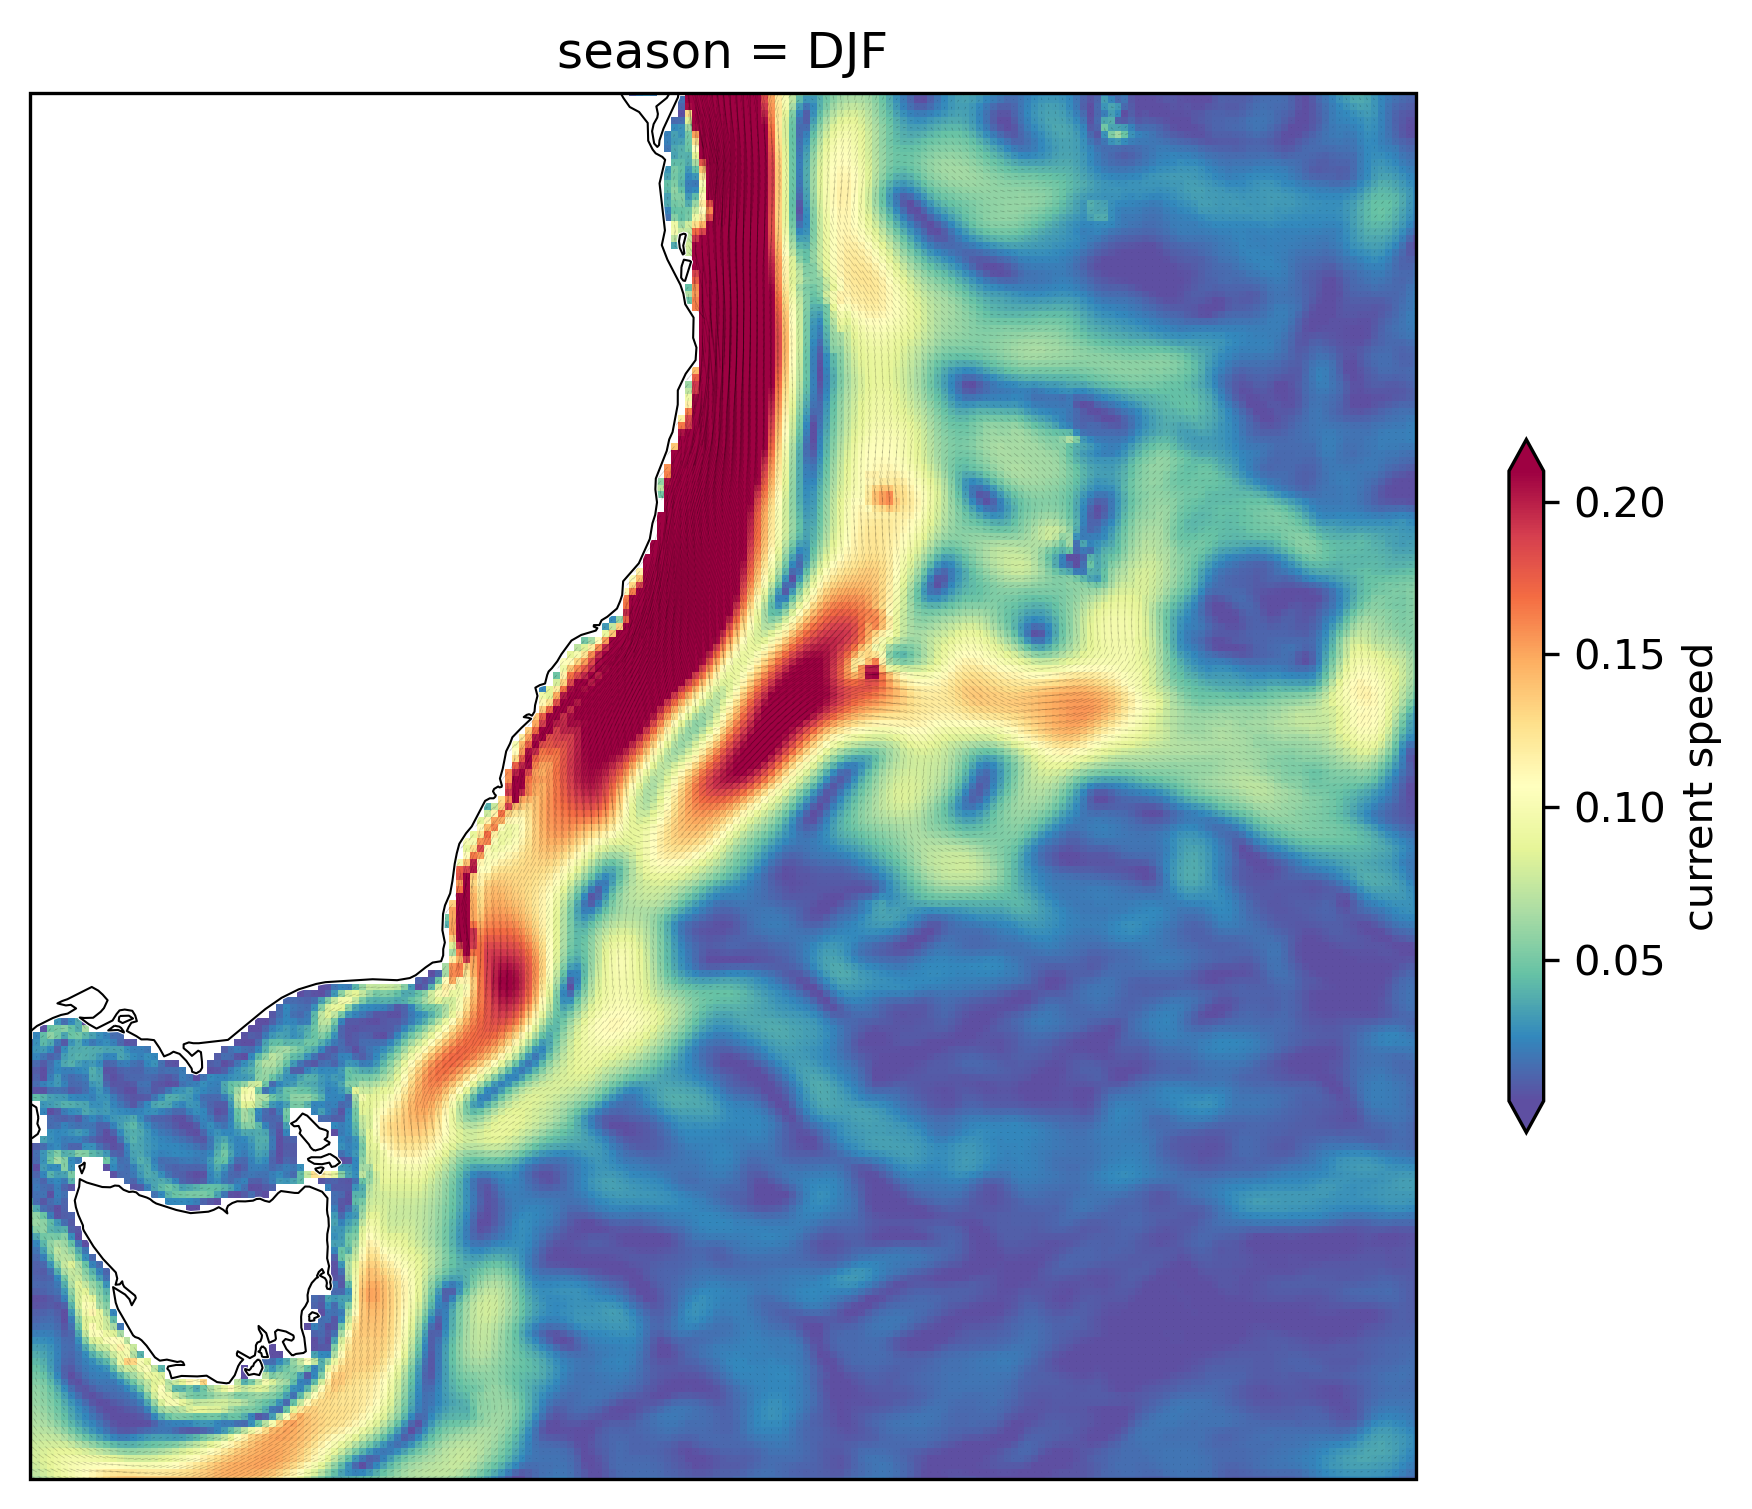

In [100]:
#plot model data
time_chosen = season_choice
transform = ccrs.PlateCarree()
cmap = 'Spectral_r'
cbar_label='current speed'
plot_data = speed

###
fig = plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
ax = plt.subplot(projection=ccrs.PlateCarree(180))
ax.set_extent([144,164, -45, -25], ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='white'))
ax.coastlines('50m',linewidth=0.5,edgecolor='grey')
plot_data.plot(transform=transform,cmap=cmap,cbar_kwargs={'label': cbar_label,'shrink':0.5},robust=True)

#plot u/v vectors
# Define the x and y coordinates
x = clim_uv.xu_ocean
y = clim_uv.yu_ocean
ax.quiver(x.values,y.values,u.values,v.values,transform=transform, units='x', width=0.01, scale=0.7, headwidth=2,alpha=0.2)


# TLDR

#### make a plot of seasonal DJF climatology for:
- NCC-NorESM2-MM CCAM
- Historical run
- Monthly surface air temperature

#### 9 lines of code and less than a minute of walltime on a small cluster

CPU times: user 2.04 s, sys: 254 ms, total: 2.29 s
Wall time: 10.6 s


Text(0.5, 1.0, 'DJF season TAS\n Historical run\n NCC-NorESM2-MM CCAM')

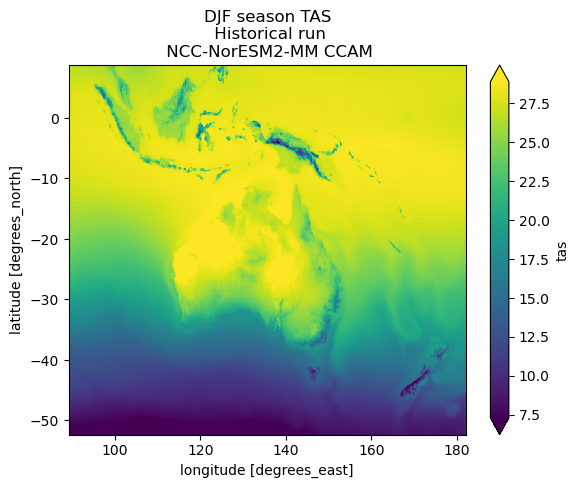

In [30]:
%%time
#load root catalogue
df_cat = intake.open_df_catalog(
    path=catalogue_path+'root_df_catalog.csv',
    columns_with_iterables=["variable"],
)
#find data source and filter data source
tas_hist_search = df_cat.search(variable="tas",model="ccam_noresm2-mm_historical_aus-10i_12km")
tas_hist_source = tas_hist_search.to_source(pass_query=True)
monthly_tas_hist = tas_hist_source.search(period='mon')
# load data lazily with Dask
DS = monthly_tas_hist.to_dask()
# convert to C from K & calculate seasonal clim
tas_C = DS.tas - 273.15
season_tas_C = tas_C.groupby('time.season').mean('time')
#plot
season_tas_C.sel(season='DJF').plot(robust=True)
plt.title('DJF season TAS\n Historical run\n NCC-NorESM2-MM CCAM')

# The End

In [61]:
client.shutdown()

2023-08-25 14:11:30,991 - distributed.nanny - WARNING - Worker process still alive after 3.1999981689453127 seconds, killing
2023-08-25 14:11:31,094 - distributed.nanny - WARNING - Worker process still alive after 3.1999981689453127 seconds, killing
2023-08-25 14:11:31,098 - distributed.nanny - WARNING - Worker process still alive after 3.1999989318847657 seconds, killing
2023-08-25 14:11:31,099 - distributed.nanny - WARNING - Worker process still alive after 3.1999987792968754 seconds, killing
2023-08-25 14:11:31,100 - distributed.nanny - WARNING - Worker process still alive after 3.1999987792968754 seconds, killing
2023-08-25 14:11:31,102 - distributed.nanny - WARNING - Worker process still alive after 3.1999987792968754 seconds, killing
2023-08-25 14:11:31,104 - distributed.nanny - WARNING - Worker process still alive after 3.1999989318847657 seconds, killing
